In [1]:
%load_ext autoreload

In [2]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")
    
%autoreload
import build_dataset
import data_statistics

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
appended
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [6]:
%autoreload
import ff_transform

In [3]:
wt_instance = wt_instance = build_dataset.wt_data.load_instance("WTG01",load_minimal=False)


Loading WTG01...
Loaded WTG01


In [544]:
signal_name = 'GbxHssRr;0,0102;m/s2'
number_of_intervals = len(wt_instance.ten_second_intervals)
interval = np.arange(number_of_intervals)
frequency_lines = [28,56,84]
horisontal_lines=[0.2]
rpm_lim = 0

vibration_signal = wt_instance.ten_second_intervals[2].sensor_df[signal_name]
time = wt_instance.ten_second_intervals[2].sensor_df['TimeStamp']

In [545]:
mean_amp = np.mean(vibration_signal)
mean_amp

1188.4723056402138

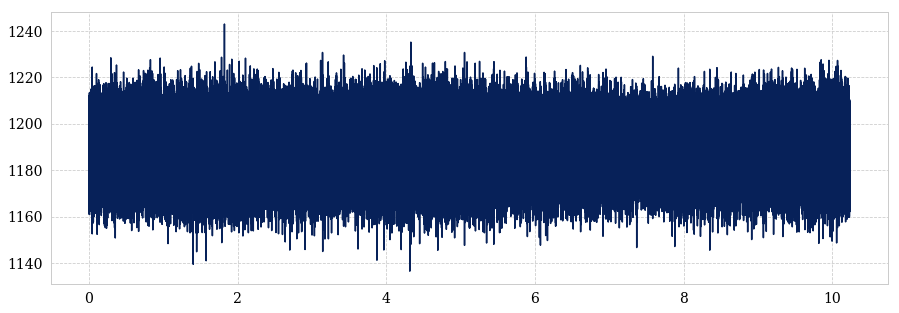

In [546]:
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(time, vibration_signal)
#plt.ylim(0,0.179)
plt.show()

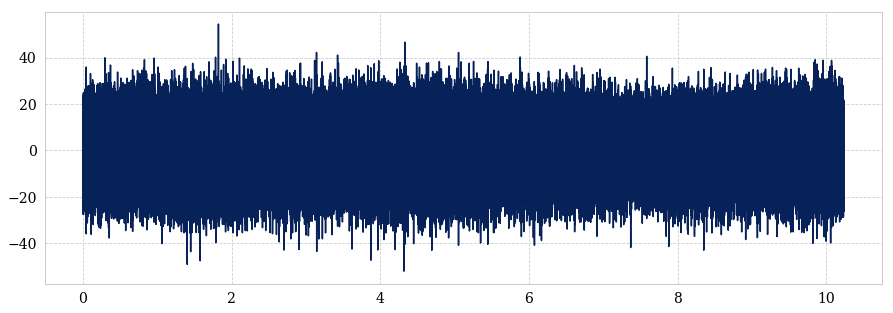

In [547]:
vibration2 = vibration_signal.copy() - mean_amp
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(time, vibration2)
#plt.ylim(0,0.179)


In [548]:
fft = np.fft.fft(vibration2)
T = time[1] - time[0]
N = vibration2.size
freq = np.linspace(0, 1/T, N)

In [549]:
np.set_printoptions(threshold=np.inf)
#np.set_printoptions(threshold=1000)

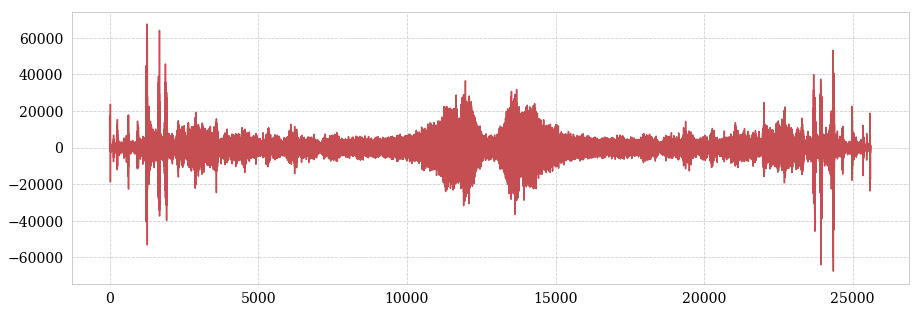

In [550]:
plt.figure(figsize=(15,5))
#plt.margins(0)
#plt.plot(freq, fft.real)
plt.plot(freq, fft.imag, 'r')
#plt.ylim(0,0.179)


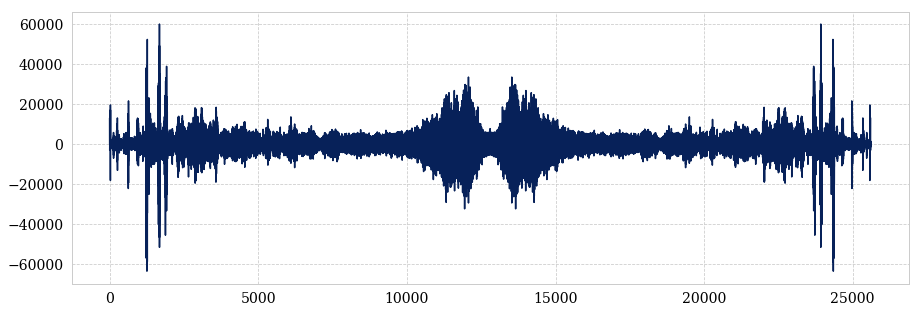

In [551]:
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(freq, fft.real)
#plt.plot(freq, fft.imag, 'r')
#plt.ylim(0,0.179)


In [552]:
freq2 = freq.copy()
freq2 = freq2[:N // 2]
y = (fft2.real)[:N // 2]* 1 / N
print(y.shape, freq2.shape)

(131072,) (131072,)


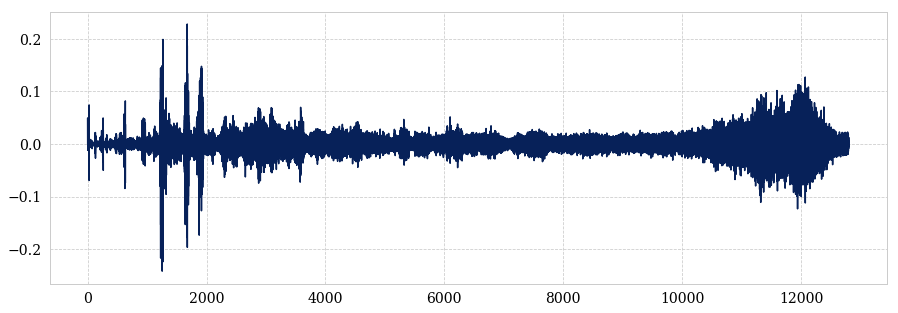

In [553]:
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(freq2, y)
#plt.plot(freq, fft.imag, 'r')
#plt.ylim(0,0.179)


In [554]:
first_index = np.where(freq2>5000)[0][0]
second_index = np.where(freq2>10000)[0][0]
print(first_index, second_index)

51200 102400


In [555]:
#time2[:first_index] = 0
y_filtered = y.copy()
y_filtered[:first_index] = 0
#time2[second_index:] = 0
y_filtered[second_index:] = 0


(-0.18, 0.179)

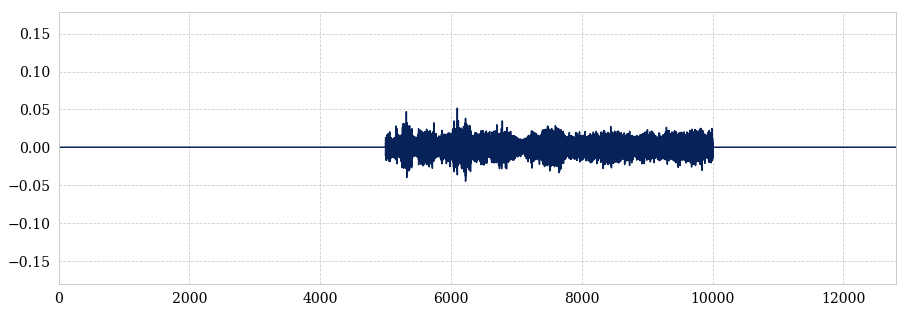

In [558]:
plt.figure(figsize=(15,5))
plt.margins(0)
plt.plot(freq2, y_filtered)
plt.ylim(-0.18,0.179)


In [559]:
shifted_y = y_filtered.copy()
shifted_x = freq2.copy()

print(shifted_y.shape, shifted_x.shape)

shifted_y = shifted_y[first_index:]
shifted_x = shifted_x[first_index:]

print(shifted_y.shape, shifted_x.shape)

(131072,) (131072,)
(79872,) (79872,)


(-0.15, 0.179)

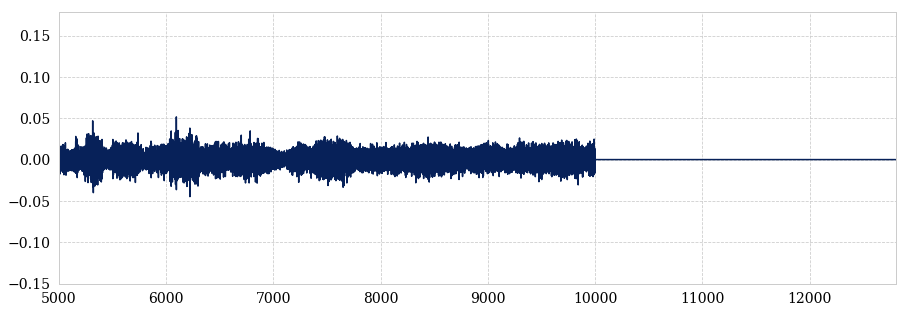

In [562]:
plt.figure(figsize=(15,5))
plt.margins(0)
plt.plot(shifted_x, shifted_y)
plt.ylim(-0.15,0.179)


## Hilbert 

In [563]:
from scipy.signal import hilbert

In [564]:
hilbert_signal = hilbert(shifted_y)

In [565]:
print(hilbert_signal[0])

(0.009380074477380599+0.007695824654393006j)


### Plot real and imaginary hilbert transformation

(-0.15, 0.179)

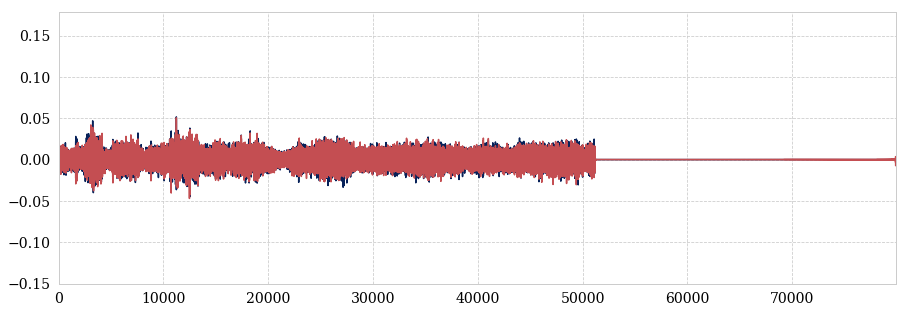

In [566]:
plt.figure(figsize=(15,5))
plt.margins(0)
plt.plot(np.arange(len(hilbert_signal)), hilbert_signal.real)
plt.plot(np.arange(len(hilbert_signal)), hilbert_signal.imag, 'r')
#plt.plot(time2, np.abs(hilbert_signal), 'g', alpha=0.4)
plt.ylim(-0.15,0.179)

### Plot abs of hilbert transformation

(-0.15, 0.179)

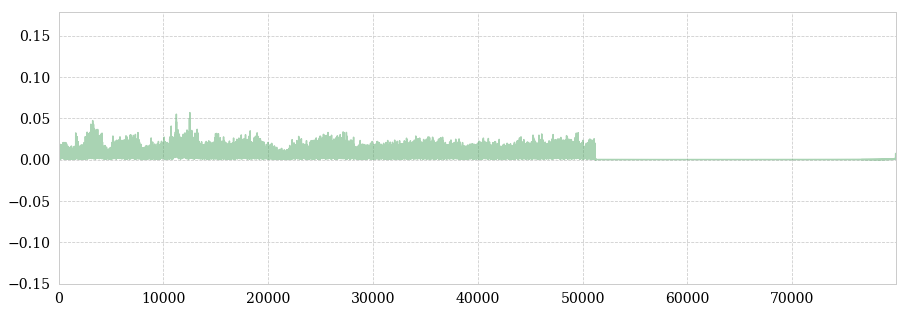

In [567]:
plt.figure(figsize=(15,5))
plt.margins(0)
#plt.plot(time2, hilbert_signal.real, alpha=0.5)
#plt.plot(time2, hilbert_signal.imag, 'r')
plt.plot(np.arange(len(hilbert_signal)), np.abs(hilbert_signal), 'g', alpha=0.5)
plt.ylim(-0.15,0.179)

### Invese Fourier 

In [568]:
inverse_hilbert = np.fft.ifft(hilbert_signal)

In [569]:
inverse_hilbert.shape

(79872,)

In [570]:
times = np.array(time_stamps)
times2 = np.linspace(0, times[-1], inverse_hilbert.shape[0])

In [571]:
inverse_hilbert[200].real

-5.5600111409513046e-21

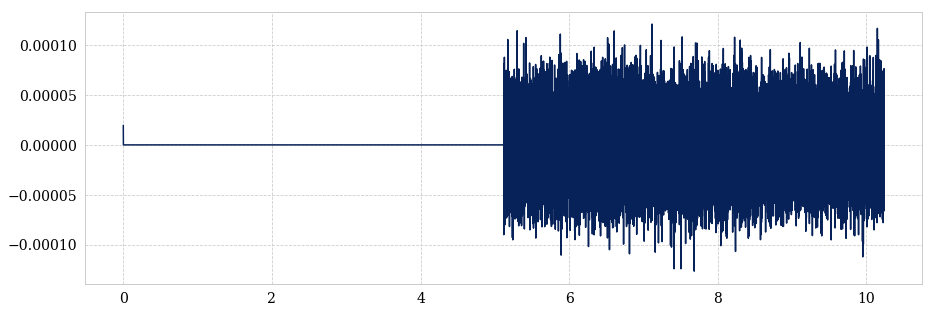

In [574]:
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(times2, inverse_hilbert.real)
#plt.plot(times2[:lim], inverse_hilbert.imag[:lim], 'r')
#plt.plot(time2, np.abs(hilbert_signal), 'g', alpha=0.4)
#plt.ylim(-0.00002,0.00002)
#plt.xlim(1, 9)
plt.show()

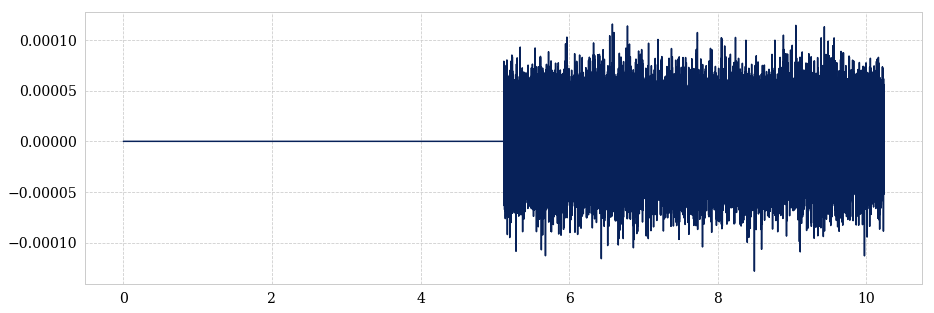

In [529]:
plt.figure(figsize=(15,5))
#plt.margins(0)
plt.plot(times2, inverse_hilbert.imag)
#plt.plot(times2[:lim], inverse_hilbert.imag[:lim], 'r')
#plt.plot(time2, np.abs(hilbert_signal), 'g', alpha=0.4)
#plt.ylim(-0.00002,0.00002)
#plt.xlim(1, 9)
plt.show()

### Multiply with Hanning filter

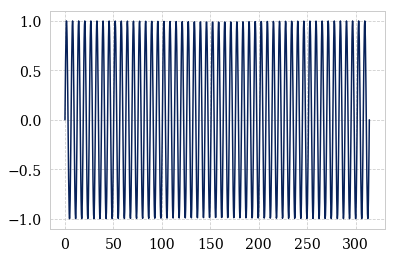

In [343]:
sinus_x = np.linspace(0, 100*np.pi, 1000)
sinus = np.sin(sinus_x)
plt.plot(sinus_x, sinus)

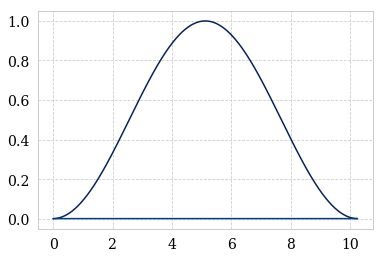

In [452]:
hanning = np.hanning(inverse_hilbert.size)
plt.plot(times2, hanning)
hanning_sinus = hanning * inverse_hilbert
plt.plot(times2, hanning_sinus.real)
#plt.plot(sinus_x, sinus, 'g')